## <span style="color:red"> Homework 3 </span>

With your toy dataset, now select an appropriate quantitative outcome - the same one you used for the homework on regression or another. <br> 
All the other variables are to be used as predictors. <br>
Be careful: ID variables should not be part of the modeling !

### Step 1 : Reading Assignment

As usual, the reading assignment is part of the next quiz

Read Section 8.2 (pp 343-354) of our Textbook [An Introduction to Statistical Learning - with Applications in Python](https://www.statlearning.com/)

### Step 2 : Handling categorical data

There are mainly two ways of handling categorical data :

1. One-hot encoding (OHE). Use pd.get_dummies or sklearn `OneHotEncoder modules`.<br>
    a. First explain what OHE accomplishes, in a small paragraph with its up and down sides.<br>
    b. Apply OHE to all of your categorical variables.<br>
    
2. Numericalization. Use sklearn LabelEncoder or better yet the method `astype('category')` followed by the attributes `.cat.codes` <br>
    a. First explain what numericalization entails with its up and down sides. <br>
    b. Apply numericalization on your chosen categorical variables. <br>

In [1]:
# Packages
import pandas as pd
import jupyter_black

jupyter_black.load()
import os

In [2]:
os.getcwd()

'/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/homework03'

In [3]:
PATH = r"/Users/fulin/Documents/GitHub/EMLyon_DSAIS/ML/homework/homework01/data"

In [4]:
# read csv
os.chdir(PATH)
df = pd.read_csv("customer_data_cbn.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 12873 non-null  float64
 1   number_vmail_messages          12873 non-null  float64
 2   total_day_minutes              12873 non-null  float64
 3   total_day_calls                12873 non-null  float64
 4   total_day_charge               12873 non-null  float64
 5   total_eve_minutes              12873 non-null  float64
 6   total_eve_calls                12873 non-null  float64
 7   total_eve_charge               12873 non-null  float64
 8   total_night_minutes            12873 non-null  float64
 9   total_night_calls              12873 non-null  float64
 10  total_night_charge             12873 non-null  float64
 11  total_intl_minutes             12873 non-null  float64
 12  total_intl_calls               12873 non-null 

In [35]:
# define the columns

numerical_features = df.iloc[:, 0:14].columns.tolist()
categorical_ohe_features = (
    df.iloc[:, 15:].drop(columns=["state", "churn"], axis=1).columns.tolist()
)
categorical_lab_features = df[["state"]].columns.tolist()

In [14]:
# split the predictors and target

predictors = df.drop(columns=["account_length", "churn"], axis=1)
target = df["account_length"]

In [15]:
# Apply the lable encoding on the predictors

predictors["state"] = predictors["state"].astype("category").cat.codes

In [16]:
# Apply the ohe on the predictors

predictors = pd.get_dummies(
    predictors,
    columns=df.iloc[:, 14:].drop(columns=["state", "churn"], axis=1).columns.tolist(),
    drop_first=True,
)

### Step 3 : Training models with default parameters

1. Use sklearn `train_test_split` to select a training sample and a test sample.
2. Train at least three differents models (one of them should not be tree-based).
3. Select the appropriate metrics to estimate scores and compare performance between the models.
4. Which handling of the categorical data is best ?

In [17]:
# Split train / test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, shuffle=True
)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# define the model
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVM": SVR(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

scores = {}

for name, model in models.items():
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    scores[name] = {
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R2": train_r2,
        "Test R2": test_r2,
    }

for model_name, metrics in scores.items():
    print(f"{model_name}:\n")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

LinearRegression:

Train MAE: 31.6535
Test MAE: 32.3208
Train R2: 0.0070
Test R2: -0.0044


DecisionTreeRegressor:

Train MAE: 0.0000
Test MAE: 16.1049
Train R2: 1.0000
Test R2: 0.2728


RandomForestRegressor:

Train MAE: 5.8872
Test MAE: 16.2092
Train R2: 0.9526
Test R2: 0.6501


SVM:

Train MAE: 31.7109
Test MAE: 32.2110
Train R2: 0.0015
Test R2: 0.0016




In [50]:
# fit the model with Logistic regression / KNN / Decision tree / Random forest

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train Logistic Regression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Train k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_np, y_train)
knn_pred = knn.predict(X_test_np)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

print("\nk-Nearest Neighbors Performance:")
print(classification_report(y_test, knn_pred))

print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_pred))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2208
           1       0.54      0.16      0.25       367

    accuracy                           0.86      2575
   macro avg       0.71      0.57      0.59      2575
weighted avg       0.83      0.86      0.83      2575


k-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2208
           1       0.65      0.47      0.55       367

    accuracy                           0.89      2575
   macro avg       0.78      0.71      0.74      2575
weighted avg       0.88      0.89      0.88      2575


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2208
           1       0.89      0.90      0.90       367

    accuracy                           0.97      2575
   macro avg       0.94      0.94

In [51]:
# Logistic Regression
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# k-Nearest Neighbors
knn_train_pred = knn.predict(X_train_np)
knn_test_pred = knn.predict(X_test_np)

# Decision Tree
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

# Random Forest
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# Display accuracies
print("Logistic Regression Accuracy:")
print(
    f"Train: {accuracy_score(y_train, lr_train_pred):.2f}, Test: {accuracy_score(y_test, lr_test_pred):.2f}"
)

print("\nk-Nearest Neighbors Accuracy:")
print(
    f"Train: {accuracy_score(y_train, knn_train_pred):.2f}, Test: {accuracy_score(y_test, knn_test_pred):.2f}"
)

print("\nDecision Tree Accuracy:")
print(
    f"Train: {accuracy_score(y_train, dt_train_pred):.2f}, Test: {accuracy_score(y_test, dt_test_pred):.2f}"
)

print("\nRandom Forest Accuracy:")
print(
    f"Train: {accuracy_score(y_train, rf_train_pred):.2f}, Test: {accuracy_score(y_test, rf_test_pred):.2f}"
)

Logistic Regression Accuracy:
Train: 0.87, Test: 0.86

k-Nearest Neighbors Accuracy:
Train: 0.95, Test: 0.89

Decision Tree Accuracy:
Train: 1.00, Test: 0.97

Random Forest Accuracy:
Train: 1.00, Test: 0.98


### Step 4 : Tuning model

1. Select the best model among the previous ones and do sequential tuning (one parameter at a time with a plot) on at least two of the parameters. <br>
    a. Print the values of the best parameters <br>
    b. Give the score of the tuned model on the test set <br>
2. Use `GridSearchCV` or `RandomizedSearchCV` from sklearn to tune 2 or more parameters <br>
    a. Print the best parameters <br>
    b. Save the best model and print its score on the test set <br>

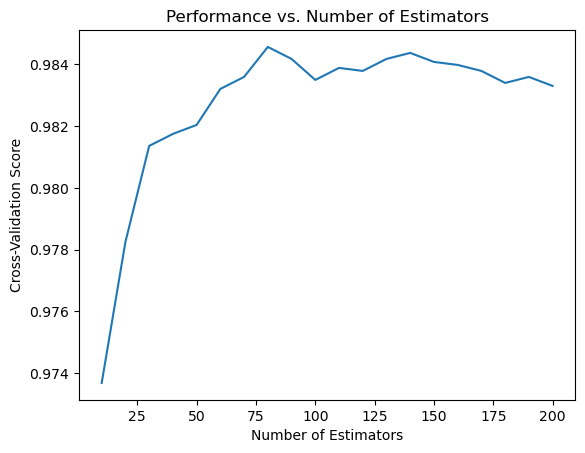

Best number of estimators: 80


In [52]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

estimators = list(range(10, 201, 10))
scores = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores.append(score)

# Plotting the scores
plt.plot(estimators, scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Cross-Validation Score")
plt.title("Performance vs. Number of Estimators")
plt.show()

best_n_estimators = estimators[scores.index(max(scores))]
print(f"Best number of estimators: {best_n_estimators}")

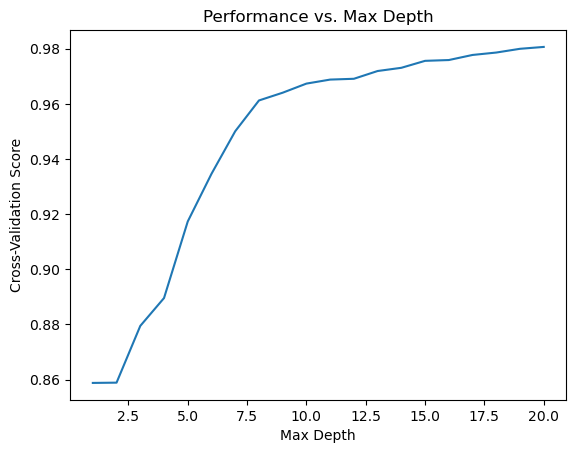

Best max depth: 20
Test Score after tuning: 0.98


In [53]:
depths = list(range(1, 21))
scores_depth = []

for depth in depths:
    rf = RandomForestClassifier(
        n_estimators=best_n_estimators, max_depth=depth, random_state=42
    )
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores_depth.append(score)

# Plotting the scores
plt.plot(depths, scores_depth)
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Score")
plt.title("Performance vs. Max Depth")
plt.show()

best_max_depth = depths[scores_depth.index(max(scores_depth))]
print(f"Best max depth: {best_max_depth}")

# Evaluating on the test set
rf_best = RandomForestClassifier(
    n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42
)
rf_best.fit(X_train, y_train)
print(f"Test Score after tuning: {rf_best.score(X_test, y_test):.2f}")

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": list(range(10, 201, 10)),
    "max_depth": list(range(1, 21)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_grid = grid_search.best_estimator_
print(f"Test Score with GridSearchCV: {best_grid.score(X_test, y_test):.2f}")

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Test Score with GridSearchCV: 0.98


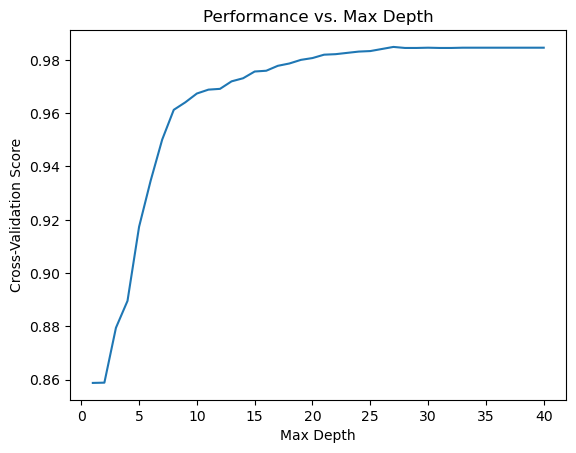

Best max depth: 27
Test Score after tuning: 0.98


In [55]:
depths = list(range(1, 41))
scores_depth = []

for depth in depths:
    rf = RandomForestClassifier(
        n_estimators=best_n_estimators, max_depth=depth, random_state=42
    )
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores_depth.append(score)

# Plotting the scores
plt.plot(depths, scores_depth)
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Score")
plt.title("Performance vs. Max Depth")
plt.show()

best_max_depth = depths[scores_depth.index(max(scores_depth))]
print(f"Best max depth: {best_max_depth}")

# Evaluating on the test set
rf_best = RandomForestClassifier(
    n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42
)
rf_best.fit(X_train, y_train)
print(f"Test Score after tuning: {rf_best.score(X_test, y_test):.2f}")

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": list(range(150, 171, 5)),
    "max_depth": list(range(25, 31)),
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_grid = grid_search.best_estimator_

train_score = best_grid.score(X_train, y_train)
print(f"Training Score with Best Grid: {train_score:.2f}")

test_score = best_grid.score(X_test, y_test)
print(f"Test Score with Best Grid: {test_score:.2f}")

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 155}
Training Score with Best Grid: 1.00
Test Score with Best Grid: 0.98
